# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import re
import warnings
warnings.simplefilter(action='ignore')
from tqdm import tqdm

import os
os.system("rm -fr ~/.cache/matplotlib")

%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
plt.rcParams['font.family'] = 'arial'

# Inputs

- Water Molecules Counted inside the TM bundle and resids 32, 202 
- For the Acidic Patch we counded Sodium and Magnesium ions around the region: 136:154 and 123:128

In [4]:
files_prefix = ["WaterBundle_","MgNaAcidicPatch_"]
sims = ["phoqaf", "phoqc", "phoqhybridrestraint", ]

# Frames per replica per simulation
phoq_af_frames = [1363, 1440, 1368]
phoq_c_frames = [1461, 1404, 1836]
phoq_hybrid_frames = [1770, 1342, 1399]

# Count Water Molecules

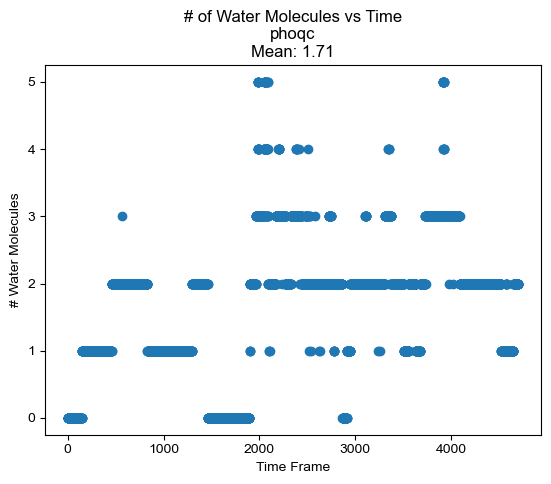

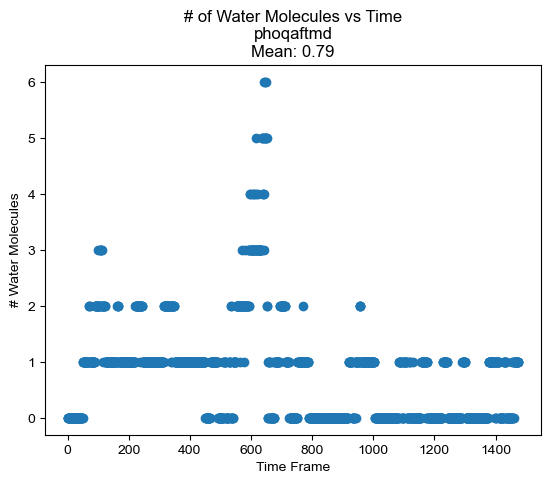

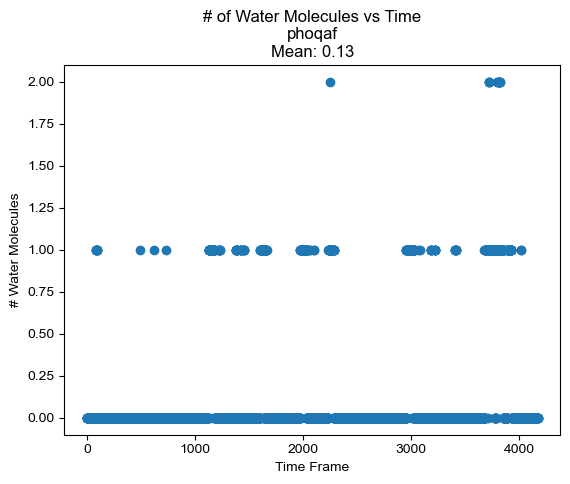

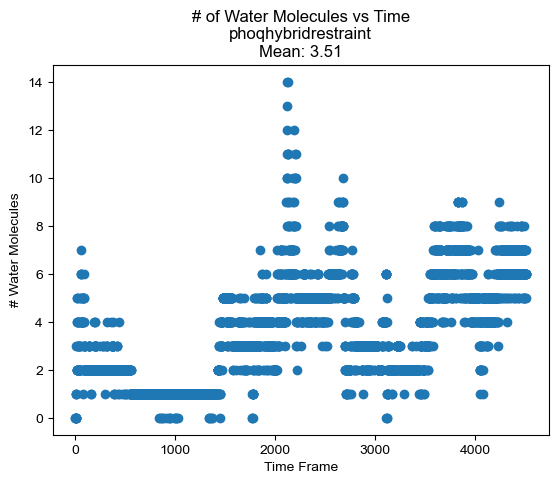

In [5]:
files = glob(f'{files_prefix[0]}*')

for file in files:
    simulation_name = re.split(f"{files_prefix[0]}|.dat",file)[1]
    df = pd.read_csv(file,header=None)
    plt.scatter(df[0],df[1])
    plt.title(f"# of Water Molecules vs Time\n{simulation_name}\nMean: {np.round(np.mean(df[1]),2)}")
    plt.xlabel("Time Frame")
    plt.ylabel("# Water Molecules")
    #plt.ylim(0,7)
    plt.show()

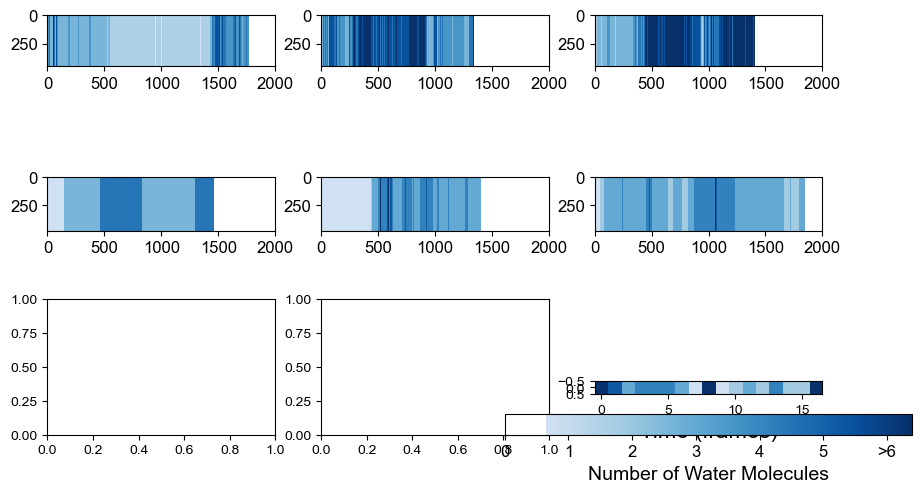

In [9]:
from numpy.ma import masked_array

def plot_stripe_per_simulation(filenames, frames_, output, t=10):
    cmap=mcolors.LinearSegmentedColormap.from_list('my_colormap', plt.cm.Blues(np.linspace(0.2,1,256)))
    fig, axs = plt.subplots(len(filenames)+1, len(frames_[0]), figsize=(10,6))    
    temp = []
    for i,(frames, filename) in enumerate(zip(frames_,filenames)):
        df = pd.read_csv(filename,header=None)
        df["Labels"] = df[1].apply(lambda x: x if x<6 else 6)
        data = np.array(df.Labels)
        
        for j in range(len(frames)):
            ax = axs[i,j]
            m = int(len(data) / t)
            if j==0:
                replica = data[:frames[0]]
            elif j==1:
                replica = data[frames[0] : frames[0]+frames[1]]
            elif j==2:
                replica = data[frames[0]+frames[1] : np.sum(frames)]
       
            labels = np.stack((replica,) * m, axis=0) 
       
            v1_pos = masked_array(labels,labels<0)
            pa = ax.imshow(v1_pos,interpolation='nearest',cmap=cmap, alpha=1)

            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.tick_params(axis='both', which='minor', labelsize=8)
            ax.set_xlim(0, 2000)  
    
    random_array = np.random.randint(0, 7, size=(1,17))
    pr = plt.imshow(random_array, interpolation="nearest", cmap=cmap, alpha=1)
    ticklabels = ['0', '1', '2', '3', '4', '5', '>6']
    sp = 0.435 # position of the middle point of the first label
    cbar = plt.colorbar(pr, orientation="horizontal", shrink=2.5)
    cbar.set_ticks(ticks=np.linspace(sp, sp*2*6 + sp, len(ticklabels)), labels=ticklabels, fontsize=12)
    cbar.set_label('Number of Water Molecules', fontsize=14)
    plt.xlabel("Time (frames)", fontsize=16)
    plt.show()

plot_stripe_per_simulation(['WaterBundle_phoqhybridrestraint.dat', 'WaterBundle_phoqc.dat'], [phoq_hybrid_frames, phoq_c_frames], "stripes")

# Magnesium Ions

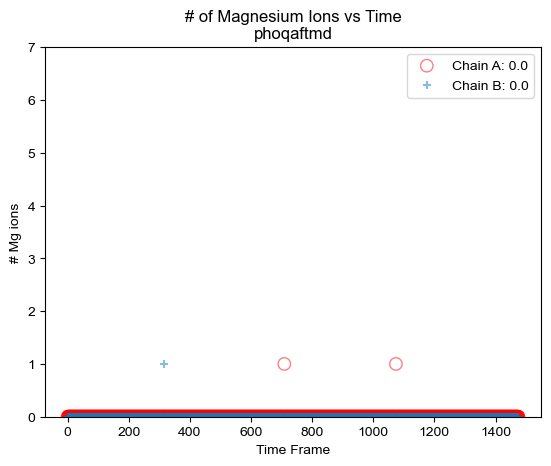

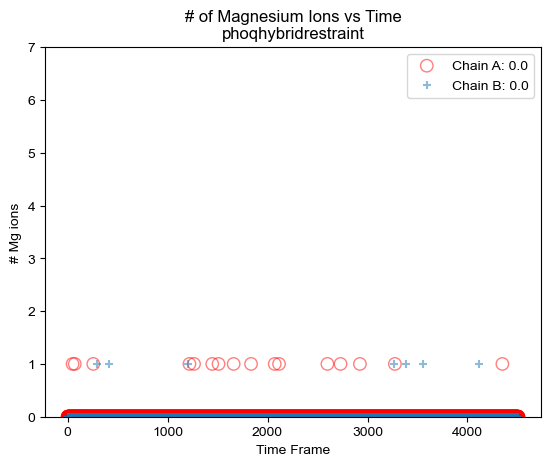

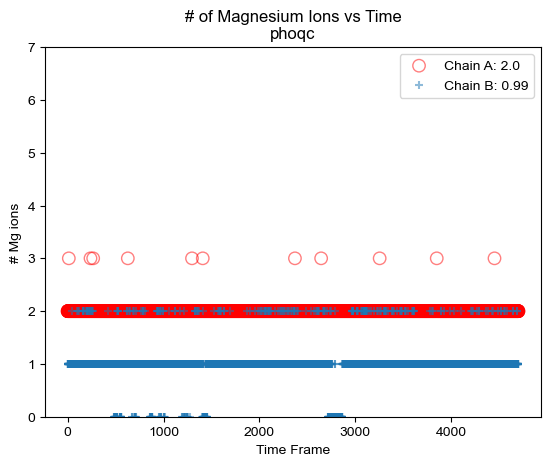

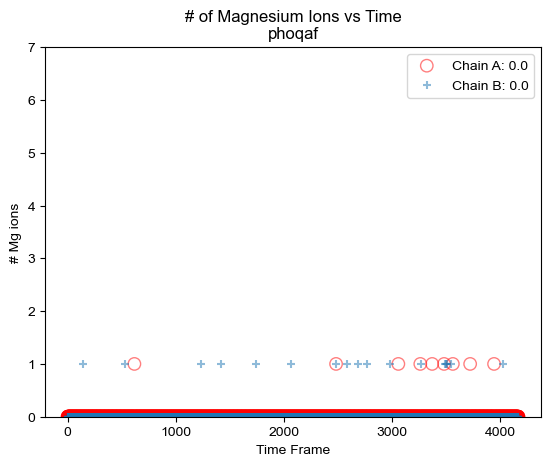

In [10]:
files = glob(f'{files_prefix[1]}*')

for file in files:
    simulation_name = re.split(f"{files_prefix[1]}|.dat",file)[1]
    df = pd.read_csv(file)
    plt.scatter(df.Frame[df.Chain==1].astype(int),df.Mg[df.Chain==1].astype(int),alpha=0.5, 
                label=f"Chain A: {np.round(np.mean(df.Mg[df.Chain==1].astype(int)),2)}",  s=80, facecolors='none', edgecolors='r')
    plt.scatter(df.Frame[df.Chain==1].astype(int),df.Mg[df.Chain==2].astype(int),alpha=0.5,
                label=f"Chain B: {np.round(np.mean(df.Mg[df.Chain==2].astype(int)),2)}", marker='+')
    plt.title(f"# of Magnesium Ions vs Time\n{simulation_name}")
    plt.xlabel("Time Frame")
    plt.ylabel("# Mg ions")
    plt.legend()
    plt.ylim(0,7)
    plt.show()

# Sodium Ions

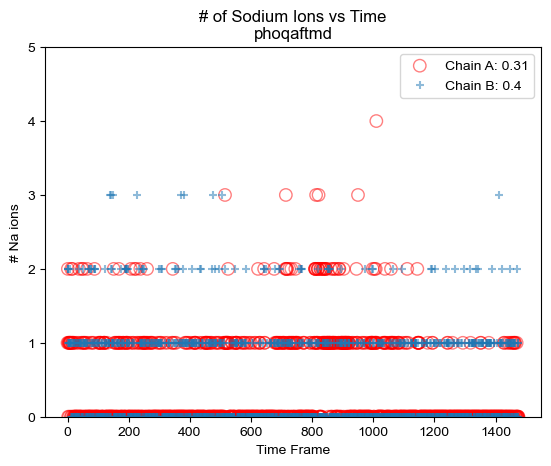

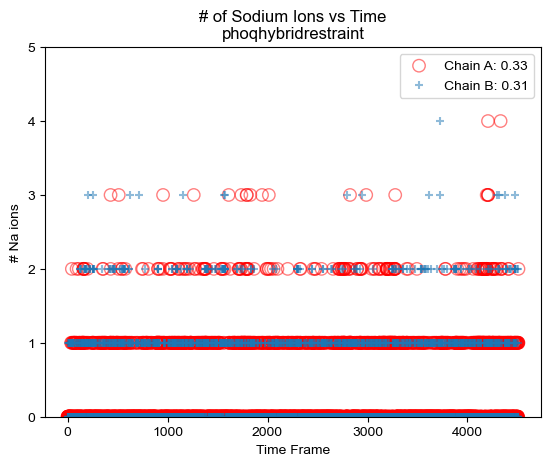

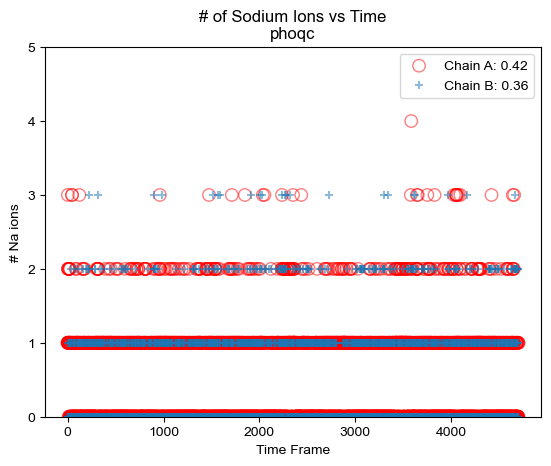

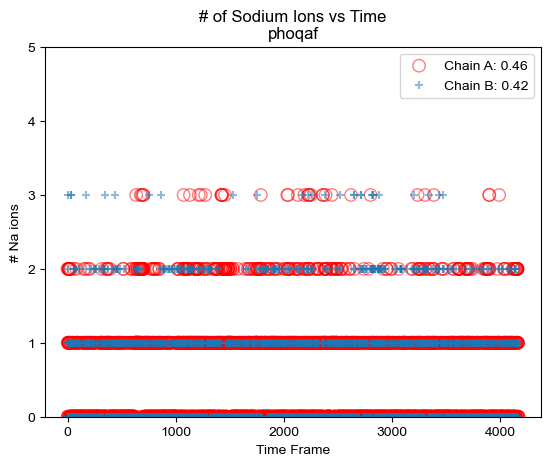

In [6]:
files = glob(f'{files_prefix[1]}*')

for file in files:
    simulation_name = re.split(f"{files_prefix[1]}|.dat",file)[1]
    df = pd.read_csv(file)
    plt.scatter(df.Frame[df.Chain==1].astype(int),df.Sod[df.Chain==1].astype(int),alpha=0.5, 
                label=f"Chain A: {np.round(np.mean(df.Sod[df.Chain==1].astype(int)),2)}",  s=80, facecolors='none', edgecolors='r')
    plt.scatter(df.Frame[df.Chain==1].astype(int),df.Sod[df.Chain==2].astype(int),alpha=0.5,
                label=f"Chain B: {np.round(np.mean(df.Sod[df.Chain==2].astype(int)),2)}", marker='+')
    plt.title(f"# of Sodium Ions vs Time\n{simulation_name}")
    plt.xlabel("Time Frame")
    plt.ylabel("# Na ions")
    plt.legend()
    plt.ylim(0,5)
    plt.show()

# Water Molecule Residence Time

The residence time of molecules:
 mean --> 286.92911877394636
  std --> 156.25468725665712

Water molecules with over 900ns residence time:
      ids  Replicas     0     1     2  Frequency
6   1789         3  1211  1211  1211   0.659586
13   298         3   971   971   971   0.528867
40  8662         1  1311  1311  1311   0.897331


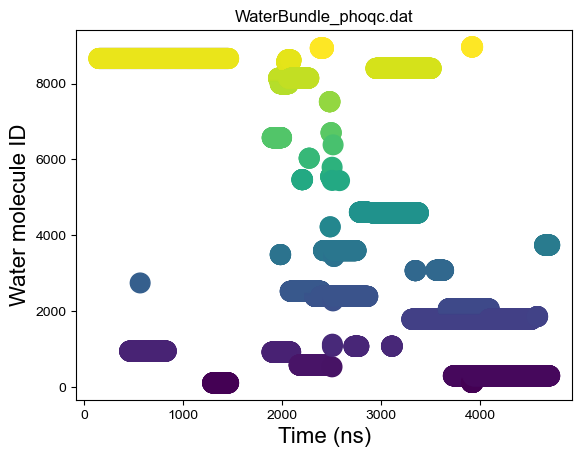





The residence time of molecules:
 mean --> 70.04014580191051
  std --> 49.21803355673445

Water molecules with over 900ns residence time:
       ids  Replicas     0     1     2  Frequency
429  8751         1  1377  1377  1377   0.942505


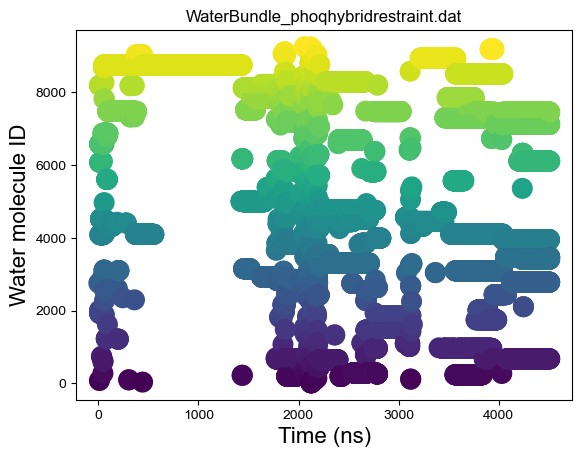

In [47]:
for file,frames in zip(['WaterBundle_phoqc.dat','WaterBundle_phoqhybridrestraint.dat'],[phoq_c_frames, phoq_hybrid_frames]):
    simulation_name = re.split(f"{files_prefix[0]}|.dat",file)[1]
    replicas = [1] * frames[0] + [2] * frames[1] + [3] * frames[2]
    df = pd.read_csv(file,header=None)
    df["Replicas"] = replicas
    df['ids'] = df[2].str.split(" ")
    df_expanded = df.explode('ids')
    ff = df_expanded.groupby(by=["ids","Replicas"]).count().reset_index()
    ff["Frequency"] = ff.apply(lambda row: row[0]/phoq_c_frames[row['Replicas']-1], axis=1)
    ff.groupby(by=["Replicas"]).mean().reset_index()
    print(f'The residence time of molecules:\n mean --> {np.mean(ff.groupby(by=["Replicas"]).mean().reset_index()[0].values)}\n  std --> {np.std(ff.groupby(by=["Replicas"]).mean().reset_index()[0].values)}')
    print(f'\nWater molecules with over 900ns residence time:\n {ff[ff[0]>900]}')
    plt.scatter(df_expanded[0], df_expanded.ids, s=200, c=df_expanded.ids, cmap='viridis')
    plt.xlabel("Time (ns)", fontsize=16)
    plt.ylabel("Water molecule ID", fontsize=16)
    plt.title(file)
    plt.show()
    print("\n\n\n")
    

# Acidic Patch - Mg - Membrane Interaction

#### Hybrid

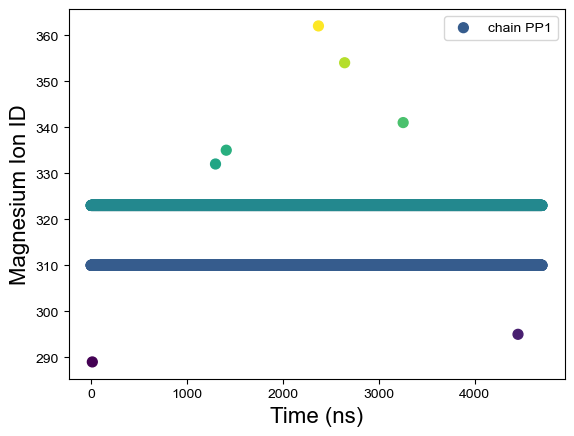

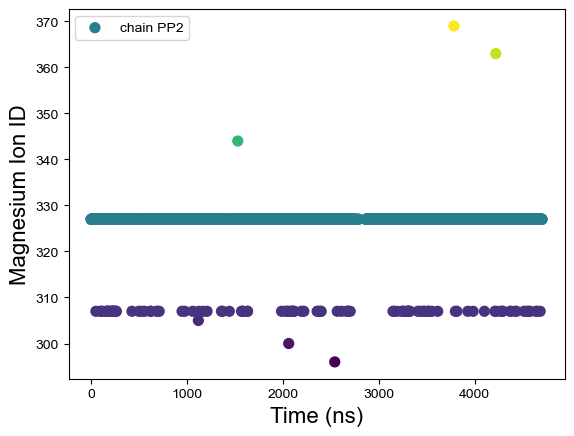

In [150]:
file = "Outputs/MgAcidicPatch_Membrane_phoqc_MGids.dat"
df = pd.read_csv(file)
df.fillna(0, inplace=True)
df['ids'] = df["ids"].str.split(" ")
df = df.explode('ids')
for chain in ['PP1', 'PP2']:
    chain_1 = df[df.Chain == chain]
    plt.scatter(chain_1.Frame, chain_1.ids.astype(float), s=50, c=chain_1.ids.astype(float), cmap='viridis', label=f"chain {chain}")
    plt.xlabel("Time (ns)", fontsize=16)
    plt.ylabel("Magnesium Ion ID", fontsize=16)
    plt.legend()
    plt.show()

#### Direct Interaction: Direct interaction of Mg to the Lipid

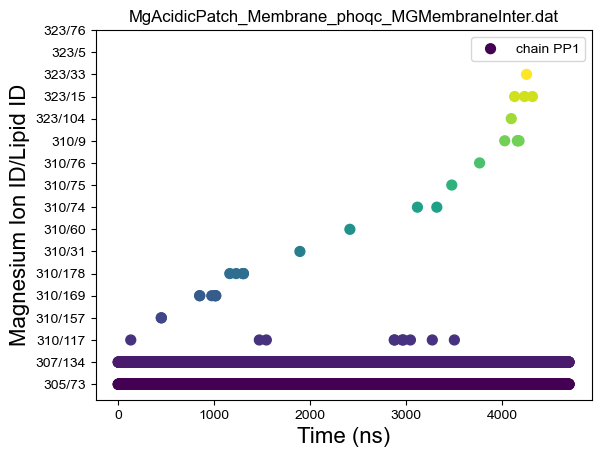

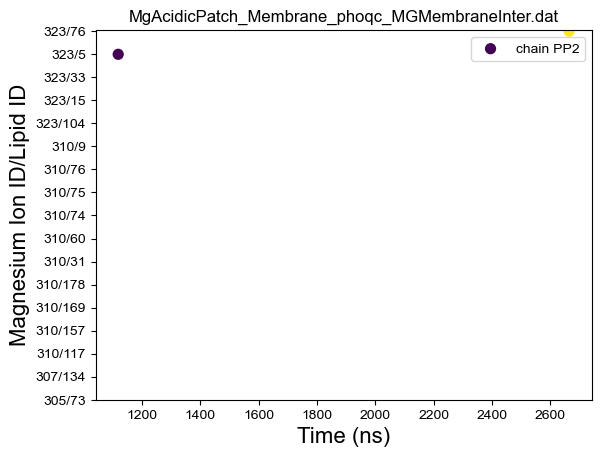

In [103]:
file = "MgAcidicPatch_Membrane_phoqc_MGMembraneInter.dat"
df2 = pd.read_csv(file)
df2.dropna(subset=['ListResids'], inplace=True)
df2['LipidID'] = df2["ListResids"].str.split(" ")
df2 = df2.explode('LipidID')
df2["Combination"] = df2['MgID'].astype(str) + "/" + df2['LipidID'].astype(str)
df2['uniqueIDs'] = pd.factorize(df2['Combination'])[0]

for chain in ['PP1', 'PP2']:
    chain_1 = df2[df2.Chain == chain]
    plt.scatter(chain_1.Frame, chain_1.uniqueIDs, s=50, c=chain_1.uniqueIDs, cmap='viridis', label=f"chain {chain}")
    plt.xlabel("Time (ns)", fontsize=16)
    plt.ylabel("Magnesium Ion ID/Lipid ID", fontsize=16)
    plt.yticks(np.unique(pd.factorize(df2['Combination'])[0]), np.unique(pd.factorize(df2['Combination'])[1]))
    plt.title(file)
    plt.legend()
    plt.show()

#### Inderect Interaction: Through water molecules

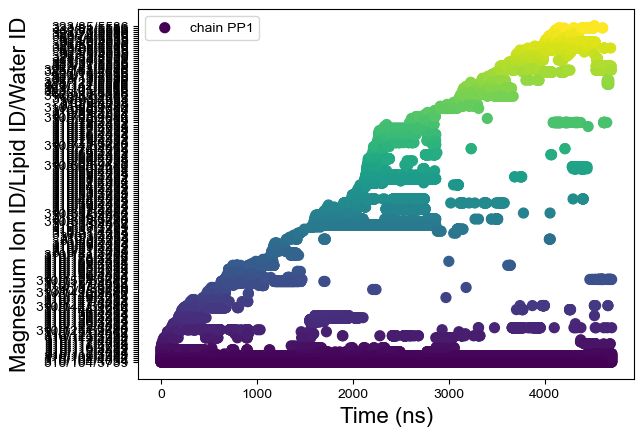

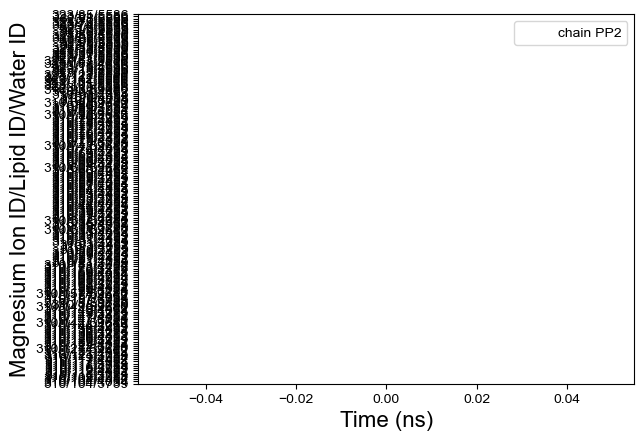

In [148]:
file = "Outputs/MgAcidicPatch_Membrane_phoqc_MGMembraneInter_Indirect.dat"
df3 = pd.read_csv(file)
df3.dropna(subset=['ListResids'], inplace=True)
df3['LipidID'] = df3["ListResids"].str.split(" ")
df3 = df3.explode('LipidID')
# Remove water molecules that appear less than 100 ns in total
grouped = df3.groupby(by=["WaterID"]).count().reset_index()
df3 = df3[df3.WaterID.isin(grouped.WaterID[grouped.Frame>100].to_list())]
df3["Combination"] = df3['MgID'].astype(str) + "/" + df3['LipidID'].astype(str) + "/" + df3['WaterID'].astype(str)
df3['uniqueIDs'] = pd.factorize(df3['Combination'])[0]

for chain in ['PP1', 'PP2']:
    chain_1 = df3[df3.Chain == chain]
    plt.scatter(chain_1.Frame, chain_1.uniqueIDs, s=50, c=chain_1.uniqueIDs, cmap='viridis', label=f"chain {chain}")
    plt.xlabel("Time (ns)", fontsize=16)
    plt.ylabel("Magnesium Ion ID/Lipid ID/Water ID", fontsize=16)
    plt.yticks(np.unique(pd.factorize(df3['Combination'])[0]), np.unique(pd.factorize(df3['Combination'])[1]))
    plt.legend()
    plt.show()

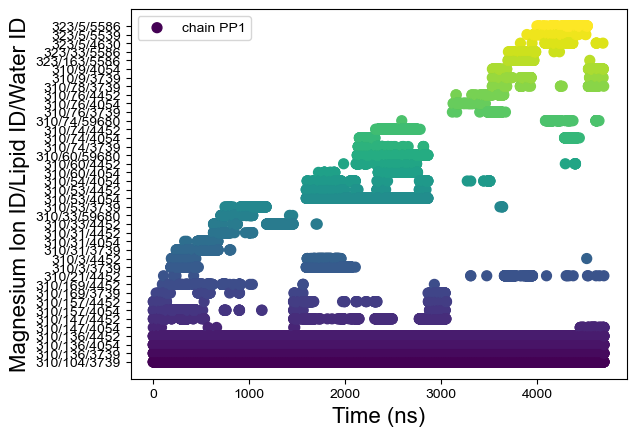

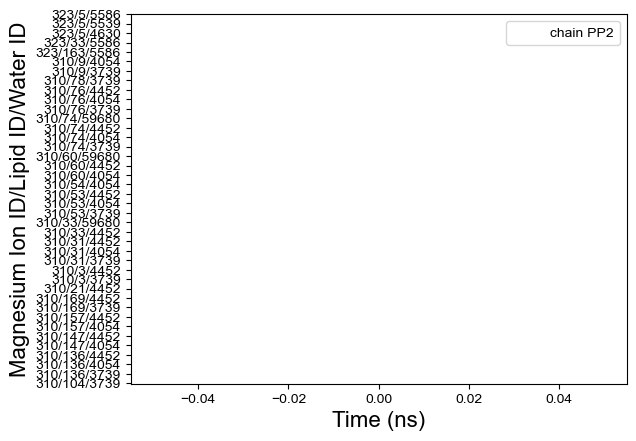

In [149]:
file = "Outputs/MgAcidicPatch_Membrane_phoqc_MGMembraneInter_Indirect.dat"
df3 = pd.read_csv(file)
df3.dropna(subset=['ListResids'], inplace=True)
df3['LipidID'] = df3["ListResids"].str.split(" ")
df3 = df3.explode('LipidID')
df3["Combination"] = df3['MgID'].astype(str) + "/" + df3['LipidID'].astype(str) + "/" + df3['WaterID'].astype(str)

# Remove Mg/Lipid/Water combinations that appear less than 100 ns in total
grouped = df3.groupby(by=["Combination"]).count().reset_index()
df3 = df3[df3.Combination.isin(grouped.Combination[grouped.Frame>100].to_list())]
df3['uniqueIDs'] = pd.factorize(df3['Combination'])[0]

for chain in ['PP1', 'PP2']:
    chain_1 = df3[df3.Chain == chain]
    plt.scatter(chain_1.Frame, chain_1.uniqueIDs, s=50, c=chain_1.uniqueIDs, cmap='viridis', label=f"chain {chain}")
    plt.xlabel("Time (ns)", fontsize=16)
    plt.ylabel("Magnesium Ion ID/Lipid ID/Water ID", fontsize=16)
    plt.yticks(np.unique(pd.factorize(df3['Combination'])[0]), np.unique(pd.factorize(df3['Combination'])[1]))
    plt.legend()
    plt.show()